In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
Data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")

In [3]:
Data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [4]:
Data.shape

(397, 6)

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [6]:
Data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [7]:
Data['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [8]:
Data['rank']=Data['rank'].replace({'Prof':0,'AsstProf':1,'AssocProf':2})

In [9]:
Data['discipline'].unique()

array(['B', 'A'], dtype=object)

In [10]:
Data['discipline']=Data['discipline'].replace({'A':0,'B':1})

In [11]:
Data['sex'].unique

<bound method Series.unique of 0      Male
1      Male
2      Male
3      Male
4      Male
       ... 
392    Male
393    Male
394    Male
395    Male
396    Male
Name: sex, Length: 397, dtype: object>

In [12]:
Data['sex']=Data['sex'].replace({'Male':0,'Female':1})

In [13]:
Data['sex'].value_counts()

0    358
1     39
Name: sex, dtype: int64

In [14]:
Data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,0,1,19,18,0,139750
1,0,1,20,16,0,173200
2,1,1,4,3,0,79750
3,0,1,45,39,0,115000
4,0,1,40,41,0,141500
...,...,...,...,...,...,...
392,0,0,33,30,0,103106
393,0,0,31,19,0,150564
394,0,0,42,25,0,101738
395,0,0,25,15,0,95329


In [15]:
Data.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,0.491184,0.544081,22.314861,17.614610,0.098237,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,0.000000,0.000000,12.000000,7.000000,0.000000,91000.000000
50%,0.000000,1.000000,21.000000,16.000000,0.000000,107300.000000
75%,1.000000,1.000000,32.000000,27.000000,0.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [16]:
Data.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,0.086266,-0.525500,-0.447499,0.132492,-0.522207
discipline,0.086266,1.000000,-0.218087,-0.164599,-0.003724,0.156084
yrs.since.phd,-0.525500,-0.218087,1.000000,0.909649,-0.148788,0.419231
yrs.service,-0.447499,-0.164599,0.909649,1.000000,-0.153740,0.334745
sex,0.132492,-0.003724,-0.148788,-0.153740,1.000000,-0.138610
salary,-0.522207,0.156084,0.419231,0.334745,-0.138610,1.000000


In [17]:
corr_mat=Data.corr()

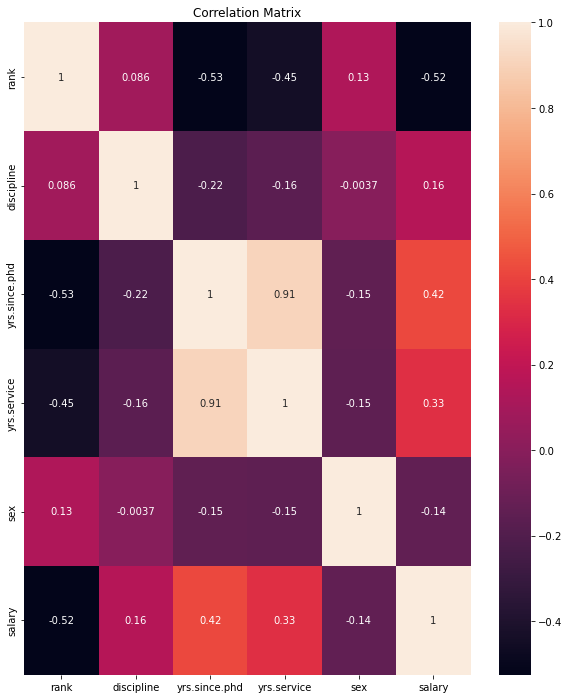

In [18]:
plt.figure(figsize=[10,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [19]:
corr_matrix=Data.corr()

In [20]:
corr_matrix["salary"].sort_values(ascending=False)

salary           1.000000
yrs.since.phd    0.419231
yrs.service      0.334745
discipline       0.156084
sex             -0.138610
rank            -0.522207
Name: salary, dtype: float64

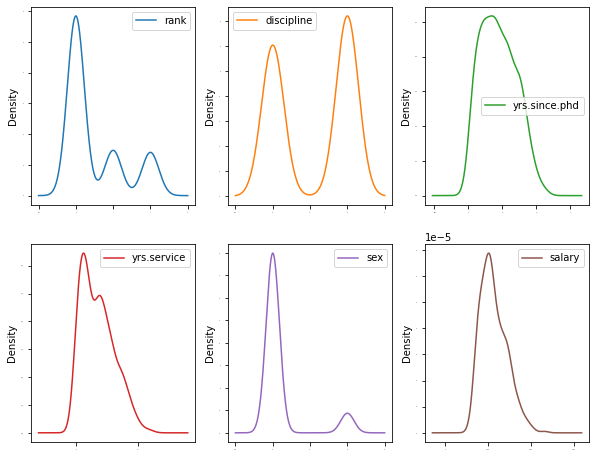

In [21]:
Data.plot(kind='kde',subplots=True,layout=(2,3),sharex=False,legend=True,fontsize=1,figsize=(10,8))
plt.show()

In [22]:
X=Data.drop("salary",axis=1)
Y=Data["salary"]

In [23]:
X.skew().sort_values(ascending=False)

sex              2.709958
rank             1.151164
yrs.service      0.650569
yrs.since.phd    0.300880
discipline      -0.177684
dtype: float64

In [24]:
from sklearn.preprocessing import power_transform

In [25]:
X_new=power_transform(X)

In [26]:
pd.DataFrame(X_new,columns=X.columns).skew().sort_values(ascending=False)

sex              2.709958
rank             0.745869
yrs.service     -0.122152
yrs.since.phd   -0.132757
discipline      -0.177684
dtype: float64

In [27]:
X= pd.DataFrame(X_new, columns=X.columns)

In [28]:
X

,rank,discipline,yrs.since.phd,yrs.service,sex
0,-0.699580,0.915403,-0.127295,0.250619,-0.330058
1,-0.699580,0.915403,-0.049178,0.105112,-0.330058
2,1.286198,0.915403,-1.628121,-1.288032,-0.330058
3,-0.699580,0.915403,1.565162,1.416860,-0.330058
4,-0.699580,0.915403,1.279680,1.506524,-0.330058
...,...,...,...,...,...
392,-0.699580,-1.092415,0.854260,0.976667,-0.330058
393,-0.699580,-1.092415,0.726155,0.320003,-0.330058
394,-0.699580,-1.092415,1.395525,0.698789,-0.330058
395,-0.699580,-1.092415,0.320172,0.028567,-0.330058


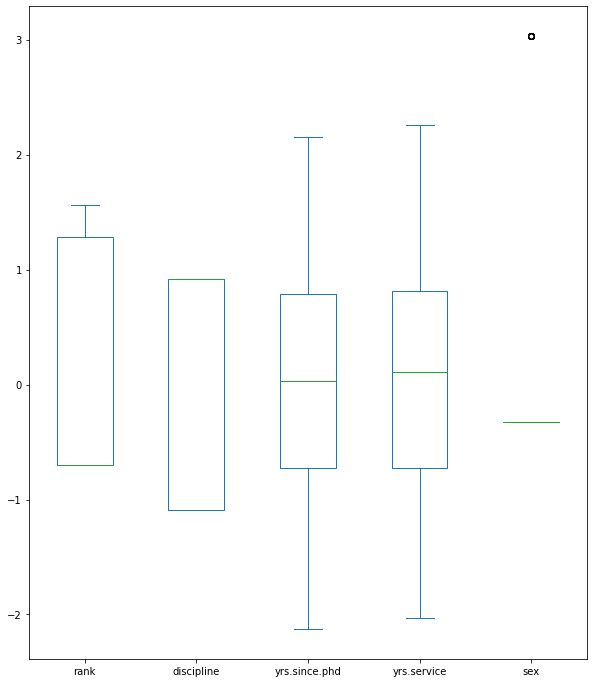

In [29]:
X.plot(kind='box',figsize=(10,12),layout=(4,3))
plt.show()

In [30]:
from scipy.stats import zscore

In [31]:
(np.abs(zscore(X))>3).all()

rank             False
discipline       False
yrs.since.phd    False
yrs.service      False
sex              False
dtype: bool

In [32]:
Scalar=StandardScaler()

In [33]:
X_Scaled=Scalar.fit_transform(X)
X_Scaled

array([[-0.69957969,  0.91540317, -0.12729454,  0.25061906, -0.3300584 ],
       [-0.69957969,  0.91540317, -0.04917821,  0.10511199, -0.3300584 ],
       [ 1.28619805,  0.91540317, -1.62812069, -1.28803213, -0.3300584 ],
       ...,
       [-0.69957969, -1.09241483,  1.39552477,  0.69878852, -0.3300584 ],
       [-0.69957969, -1.09241483,  0.32017198,  0.02856739, -0.3300584 ],
       [ 1.28619805, -1.09241483, -1.13497737, -1.12348349, -0.3300584 ]])

In [34]:
LR=LinearRegression()

In [40]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=i)
    LR.fit(X_train,y_train)
    pred_train=LR.predict(X_train)
    pred_test=LR.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',r2_score(y_test,pred_test))
    print("/n")

At random state 0 the testing accurancy is:- 0.47171032074192876
/n
At random state 1 the testing accurancy is:- 0.4859369157572503
/n
At random state 2 the testing accurancy is:- 0.4075714597240344
/n
At random state 3 the testing accurancy is:- 0.3607224449102907
/n
At random state 4 the testing accurancy is:- 0.3608962601915283
/n
At random state 5 the testing accurancy is:- 0.3469212268983829
/n
At random state 6 the testing accurancy is:- 0.47449349271626307
/n
At random state 7 the testing accurancy is:- 0.5027717716244775
/n
At random state 8 the testing accurancy is:- 0.4047110745846785
/n
At random state 9 the testing accurancy is:- 0.433485996278423
/n
At random state 10 the testing accurancy is:- 0.41159053438150217
/n
At random state 11 the testing accurancy is:- 0.3047616318761822
/n
At random state 12 the testing accurancy is:- 0.4173137939240671
/n
At random state 13 the testing accurancy is:- 0.3852111479951218
/n
At random state 14 the testing accurancy is:- 0.20245468

In [41]:
 X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=80)

In [42]:
LR.fit(X_train,y_train)

LinearRegression()

In [56]:
pred_test=LR.predict(X_test)
pred_test

array([123616.85273293, 132663.04958073, 115921.41910435, 117706.15322358,
       121641.15176611,  94044.69898356, 118309.46768577,  82006.00054518,
        80882.62760109,  94998.4142153 , 129881.97348334,  88072.51322829,
       114901.70400293, 133624.19780903,  77833.14546313, 130606.59322137,
       123495.6359665 ,  89768.02599773,  78194.2638328 , 112840.60380231,
       127952.23153393,  94701.08994505,  90243.60370797,  79647.74785856,
       132991.10675798, 130807.56249868,  74366.38332446, 129361.6060355 ,
       102018.38015326, 134092.47561137,  78449.54350967, 121802.97974823,
        89835.87502454, 116340.93639742, 116787.29072354, 117487.94410411,
       131520.1153057 , 130618.88694337, 116635.2694839 , 122199.84089627,
       121186.42670269,  88267.35827017,  89381.9700914 , 138431.15028064,
        89510.98616682, 137262.1955339 , 123776.2991055 ,  90182.74653265,
       123755.40843547,  89510.98616682,  91429.28833571, 130413.75616779,
        77696.63992528,  

In [62]:
r2_score(y_test,pred_test)

0.5674250432774719

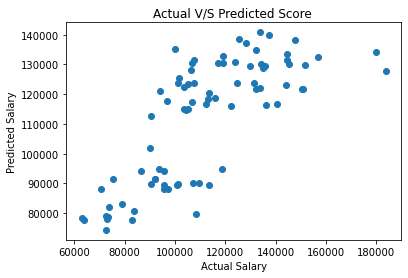

In [63]:
plt.scatter(y_test,pred_test)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual V/S Predicted Score ")
plt.show()

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [73]:
from sklearn.model_selection import KFold,cross_val_score

In [74]:
Score=r2_score(y_test,pred_test)

In [82]:
for j in range(0,20):
    validation=cross_val_score(LR,X_Scaled,Y,cv=j)
    validation_mean=validation.mean()
    print('At cross validation',i,'Cross Validation mean is',validation_mean,'and accuracy is',score)
    print('\n')
   

ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=0.

In [ ]:
LinearRegression().get_params().keys()

In [ ]:
LR.predict()